In [15]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

# Defining the Functions

In [16]:
def get_design_matrix(X):
    # Takes shape of X as n,k
    (n,k)=X.shape
    p=k+1
    
    # Make an array of ones at size n,p
    X_train = np.ones(shape=(n,p))
    # Replace columns starting from index 1 with X
    X_train[:, 1:] = X
    
    # Return design matrix
    return X_train

In [17]:
def get_best_model(X_train,y):
    
    # Calculate the model vector using the ordinary least squares (OLS) method 
    # beta_hat = (X`X)^-1 X`y
    model = np.dot(np.dot(inv(np.dot(X_train.T,X_train)), X_train.T),y)
    
    return model

In [18]:
def get_predictions(model, X_train):
    
    # Calculate the y_hat vector
    # y_hat = X beta_hat
    y_hat=np.dot(X_train, model)
    
    return y_hat

In [19]:
def get_SSE(X_train,y,model):
    
    X_train = X_train.astype(float)  # Convert X to float
    y = y.astype(float)  # Convert y to float
    
    # Calculate the SSE
    # SSE = y`y - beta_hat`X_train`y
    return np.dot(y.T,y)-np.dot(model.T,np.dot(X_train.T,y))

In [20]:
def get_SST(y):
    
    # Calculate the SST
    # SST = y`y-(1/n)(sum y)^2
    return np.dot(y.T,y)-(y.sum())**2/len(y)

In [21]:
def build_anova(X_train, SSE, SST):
    
    # Calculate the SSR
    SSR=SST-SSE
    
    # Takes shape of X_train as n,p
    (n,p)=X_train.shape
    k=p-1
    
    # Calculate the MSE, MSR and Fnode
    MSE=SSE/(n-p)
    MSR=SSR/k
    Fnode=MSR/MSE
    
    print(f"{('Source'):<11}|{' SS':<17}|{'DF':<7}| {'MS':<16}| {'F':<19}|")
    print(f"{('Regression'):<11}| {SSR.round(2):<16}| {k:<6}| {MSR.round(2):<16}| F0 = {Fnode.round(2):<14}|")
    print(f"{('Residual'):<11}| {SSE.round(2):<16}| {n-p:<6}| {MSE.round(2):<16}|")
    print(f"{('Total'):<11}| {SST.round(2):<16}| {n-1:<6}|")

In [22]:
def get_R2adj(SSE,SST,n,p):
    
    # Calculate the R-Square Adjusted for the Model
    # R2adj = 1 - ((n-1)/(n-p))*(SSE/SST)
    return 1-(((n-1)*SSE)/((n-p)*SST))

In [23]:
# Reading the Data
data=pd.read_csv('diamonds.csv')

In [24]:
# Displaying the Data
data

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      4.23  2.63  
4      4.35  2.75  
...     ...   ...  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64  

[53940 rows x 11 columns]

In [25]:
# Checking for Duplicated and Missing Values
print('The Number of Duplicates:',data.duplicated().sum())
print('The Number of Null Values:',data.isnull().sum())

The Number of Duplicates: 0
The Number of Null Values: Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


In [26]:
# Making a DataFrame for Quantative Data
df = data[['carat','depth','table','x','y','z','price']]
df

carat  depth  table     x     y     z  price
0       0.23   61.5   55.0  3.95  3.98  2.43    326
1       0.21   59.8   61.0  3.89  3.84  2.31    326
2       0.23   56.9   65.0  4.05  4.07  2.31    327
3       0.29   62.4   58.0  4.20  4.23  2.63    334
4       0.31   63.3   58.0  4.34  4.35  2.75    335
...      ...    ...    ...   ...   ...   ...    ...
53935   0.72   60.8   57.0  5.75  5.76  3.50   2757
53936   0.72   63.1   55.0  5.69  5.75  3.61   2757
53937   0.70   62.8   60.0  5.66  5.68  3.56   2757
53938   0.86   61.0   58.0  6.15  6.12  3.74   2757
53939   0.75   62.2   55.0  5.83  5.87  3.64   2757

[53940 rows x 7 columns]

In [27]:
# Displaying the Datatypes
df.dtypes

carat    float64
depth    float64
table    float64
x        float64
y        float64
z        float64
price      int64
dtype: object

In [59]:
df

carat  depth  table     x     y     z  price
0       0.23   61.5   55.0  3.95  3.98  2.43    326
1       0.21   59.8   61.0  3.89  3.84  2.31    326
2       0.23   56.9   65.0  4.05  4.07  2.31    327
3       0.29   62.4   58.0  4.20  4.23  2.63    334
4       0.31   63.3   58.0  4.34  4.35  2.75    335
...      ...    ...    ...   ...   ...   ...    ...
53935   0.72   60.8   57.0  5.75  5.76  3.50   2757
53936   0.72   63.1   55.0  5.69  5.75  3.61   2757
53937   0.70   62.8   60.0  5.66  5.68  3.56   2757
53938   0.86   61.0   58.0  6.15  6.12  3.74   2757
53939   0.75   62.2   55.0  5.83  5.87  3.64   2757

[53940 rows x 7 columns]

In [29]:
# Making a NumPy array of the DataFrame
df_np=df.to_numpy()

# Assigning the Features to X and Target to Y
X,y=df_np[:, :(df_np.shape[1]-1)],df_np[:,-1]

# Converting X to X_train (Design Matrix)
X_train=get_design_matrix(X)
X_train,y

(array([[ 1.  ,  0.23, 61.5 , ...,  3.95,  3.98,  2.43],
        [ 1.  ,  0.21, 59.8 , ...,  3.89,  3.84,  2.31],
        [ 1.  ,  0.23, 56.9 , ...,  4.05,  4.07,  2.31],
        ...,
        [ 1.  ,  0.7 , 62.8 , ...,  5.66,  5.68,  3.56],
        [ 1.  ,  0.86, 61.  , ...,  6.15,  6.12,  3.74],
        [ 1.  ,  0.75, 62.2 , ...,  5.83,  5.87,  3.64]]),
 array([ 326.,  326.,  327., ..., 2757., 2757., 2757.]))

In [30]:
# Declaring and Initializing Variables
model = get_best_model(X_train, y)
SSE=get_SSE(X_train,y,model)
SST=get_SST(y)
R2adj=get_R2adj(SSE,SST,len(y),len(model))

print('The ANOVA Table before Preprocessing:-\n')
build_anova(X_train, SSE, SST)
print('\nThe Accuracy Before Preprocessing',R2adj.round(6)*100,'%')

The ANOVA Table before Preprocessing:-

Source     | SS              |DF     | MS              | F                  |
Regression | 737616157025.56 | 6     | 122936026170.93 | F0 = 54860.78      |
Residual   | 120856978491.83 | 53933 | 2240872.54      |
Total      | 858473135517.4  | 53939 |

The Accuracy Before Preprocessing 85.92030000000001 %


# Preprocessing (I)

In [31]:
data

Unnamed: 0  carat        cut color clarity  depth  table  price     x  \
0               1   0.23      Ideal     E     SI2   61.5   55.0    326  3.95   
1               2   0.21    Premium     E     SI1   59.8   61.0    326  3.89   
2               3   0.23       Good     E     VS1   56.9   65.0    327  4.05   
3               4   0.29    Premium     I     VS2   62.4   58.0    334  4.20   
4               5   0.31       Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...        ...   ...     ...    ...    ...    ...   ...   
53935       53936   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75   
53936       53937   0.72       Good     D     SI1   63.1   55.0   2757  5.69   
53937       53938   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66   
53938       53939   0.86    Premium     H     SI2   61.0   58.0   2757  6.15   
53939       53940   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      4.23  2.63  
4      4.35  2.75  
...     ...   ...  
53935  5.76  3.50  
53936  5.75  3.61  
53937  5.68  3.56  
53938  6.12  3.74  
53939  5.87  3.64  

[53940 rows x 11 columns]

In [32]:
# Making a new DataFrame with every feature
df_new=data[['carat','cut','color','clarity','depth','table','x','y','z','price']]

In [33]:
# Printing the unique values of categorical columns
print(df_new['cut'].unique())
print(df_new['color'].unique())
print(df_new['clarity'].unique())

['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
['E' 'I' 'J' 'H' 'F' 'G' 'D']
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


In [34]:
# Replacing the categorical values with numerical values
df_new['cut'] = df_new['cut'].replace({'Fair': 1, 'Good': 2,'Very Good':3,'Premium':4,'Ideal':5})
df_new['color'] = df_new['color'].replace({'J': 1, 'I': 2,'H':3,'G':4,'F':5,'E':6,'D':7})
df_new['clarity'] = df_new['clarity'].replace({'I1': 1, 'SI1': 2,'SI2':3,'VS1':4,'VS2':5,'VVS1':6,'VVS2':7,'IF':8})

In [35]:
# Checking the unique values after replacing
print(df_new['cut'].unique())
print(df_new['color'].unique())
print(df_new['clarity'].unique())


[5 4 2 3 1]
[6 2 1 3 5 4 7]
[3 2 4 5 7 6 1 8]


In [36]:
# Checking the DataTypes
df_new.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [37]:
# Making a NumPy array of the DataFrame
df_new_np=df_new.to_numpy()

# Assigning the Features to X and Target to Y
X,y=df_new_np[:, :(df_new.shape[1]-1)],df_new_np[:,-1]

# Converting X to X_train (Design Matrix)
X_train=get_design_matrix(X)
X_train,y

(array([[1.  , 0.23, 5.  , ..., 3.95, 3.98, 2.43],
        [1.  , 0.21, 4.  , ..., 3.89, 3.84, 2.31],
        [1.  , 0.23, 2.  , ..., 4.05, 4.07, 2.31],
        ...,
        [1.  , 0.7 , 3.  , ..., 5.66, 5.68, 3.56],
        [1.  , 0.86, 4.  , ..., 6.15, 6.12, 3.74],
        [1.  , 0.75, 5.  , ..., 5.83, 5.87, 3.64]]),
 array([ 326.,  326.,  327., ..., 2757., 2757., 2757.]))

In [38]:
# Declaring and Initializing Variables
new_model=get_best_model(X_train, y)
SSE_new=get_SSE(X_train,y,new_model)
SST_new=get_SST(y)
R2adj_new=get_R2adj(SSE_new,SST_new,len(y),len(new_model))

print('The ANOVA Table After Preprocessing(I):-\n')
build_anova(X_train, SSE_new, SST_new)
print('\nThe Accuracy After Preprocessing(I)',R2adj_new.round(6)*100,'%')

The ANOVA Table After Preprocessing(I):-

Source     | SS              |DF     | MS              | F                  |
Regression | 768130207768.53 | 9     | 85347800863.17  | F0 = 50948.17      |
Residual   | 90342927748.86  | 53930 | 1675188.72      |
Total      | 858473135517.4  | 53939 |

The Accuracy After Preprocessing(I) 89.47460000000001 %


# Preprocessing (II)

In [39]:
# Calculate the correlation of features to the target (Price)
df_new.corr()['price']

carat      0.921591
cut       -0.053491
color     -0.172511
clarity   -0.104883
depth     -0.010647
table      0.127134
x          0.884435
y          0.865421
z          0.861249
price      1.000000
Name: price, dtype: float64

In [40]:
# Calculate the correlation of 'depth' to other features to prove orthogonality 
df_new.corr()['depth']

carat      0.028224
cut       -0.218055
color     -0.047279
clarity   -0.068280
depth      1.000000
table     -0.295779
x         -0.025289
y         -0.029341
z          0.094924
price     -0.010647
Name: depth, dtype: float64

In [41]:
# Calculate the correlation of 'cut' to other features to prove orthogonality 
df_new.corr()['cut']

carat     -0.134967
cut        1.000000
color      0.020519
clarity    0.175029
depth     -0.218055
table     -0.433405
x         -0.125565
y         -0.121462
z         -0.149323
price     -0.053491
Name: cut, dtype: float64

In [42]:
# Creating a new DataFrame with the features we'll use (All)
df_new2=df_new[['carat','cut','color','clarity','depth','table','x','y','z','price']]

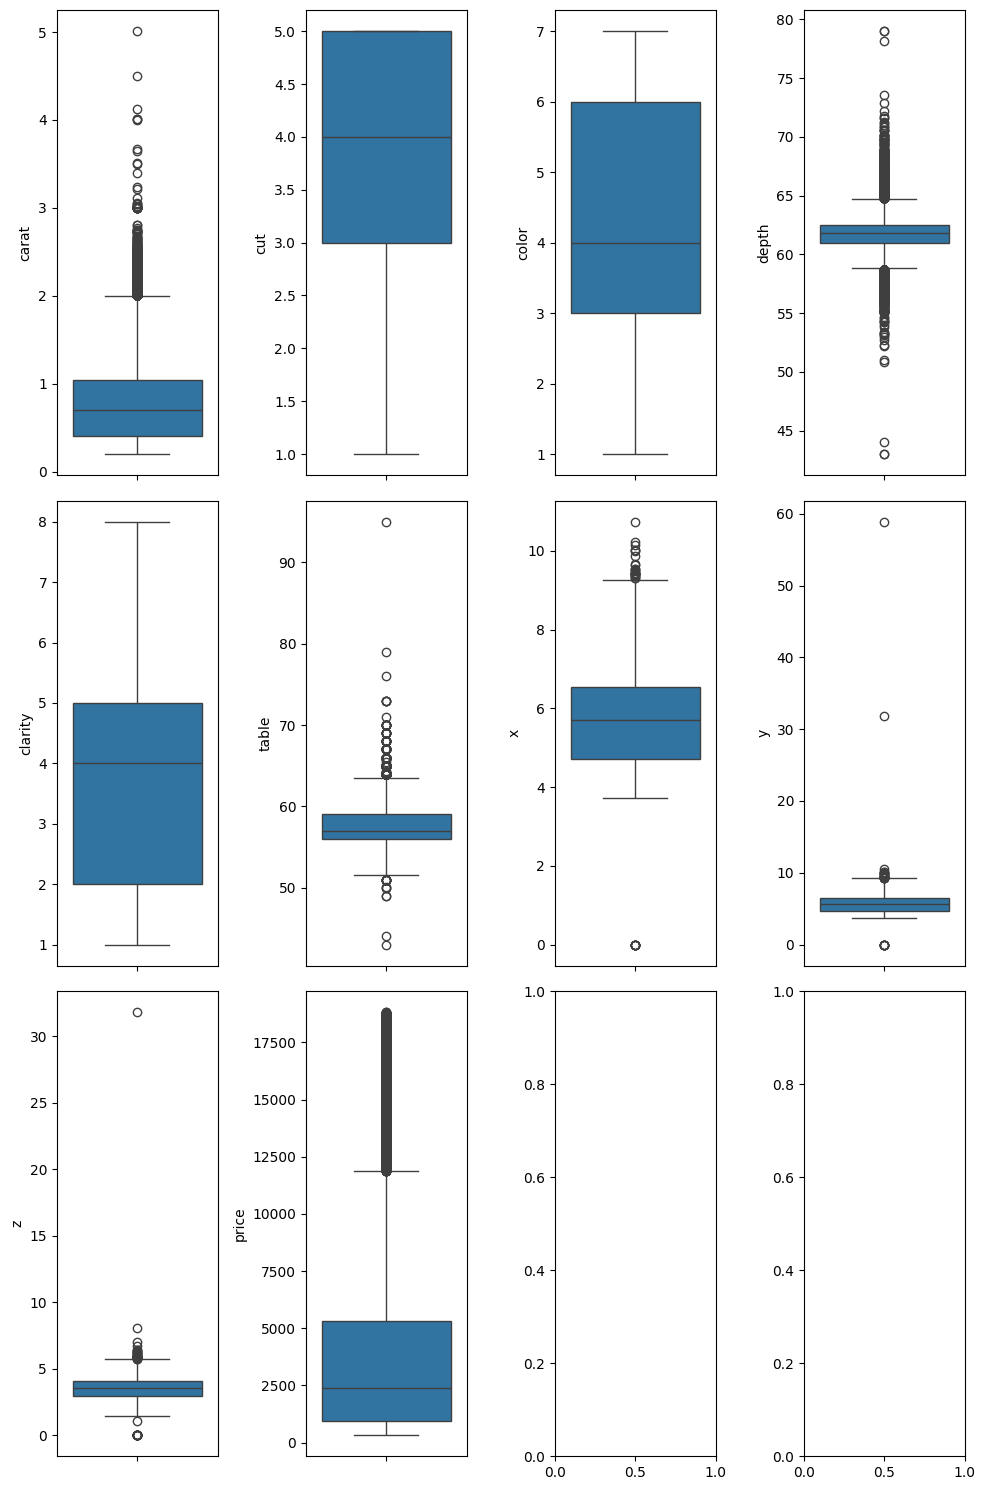

In [43]:
import seaborn as sns

# Displaying boxplot to showcase outliars
fig ,axes=plt.subplots(3,4,figsize=(10,15))

sns.boxplot(data=df_new2['carat'],ax=axes[0,0])
sns.boxplot(data=df_new2['cut'],ax=axes[0,1])
sns.boxplot(data=df_new2['color'],ax=axes[0,2])
sns.boxplot(data=df_new2['depth'],ax=axes[0,3])
sns.boxplot(data=df_new2['clarity'],ax=axes[1,0])
sns.boxplot(data=df_new2['table'],ax=axes[1,1])
sns.boxplot(data=df_new2['x'],ax=axes[1,2])
sns.boxplot(data=df_new2['y'],ax=axes[1,3])
sns.boxplot(data=df_new2['z'],ax=axes[2,0])
sns.boxplot(data=df_new2['price'],ax=axes[2,1])

fig.tight_layout()

In [44]:
# Making a function to print the maximum non-outlier values
def max_non_outliers(df_new2):
    max_values = {}
    for column in df.columns:
        data = df[column]
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        non_outliers = data[(data >= lower_bound) & (data <= upper_bound)]
        max_values[column] = non_outliers.max()
    return max_values
print(max_non_outliers(df_new2))

{'carat': 2.0, 'depth': 64.7, 'table': 63.5, 'x': 9.26, 'y': 9.26, 'z': 5.73, 'price': 11883}


In [45]:
# Replacing all the upper outliers with the maximum value
df_new2["carat"] = df_new2["carat"].apply(lambda x: 2 if x > 2 else x)
df_new2["depth"] = df_new2["depth"].apply(lambda x: 64.7 if x > 64.7 else x)
df_new2["table"] = df_new2["table"].apply(lambda x: 63.5 if x > 63.5 else x)
df_new2["x"] = df_new2["x"].apply(lambda x: 9.26 if x > 9.26 else x)
df_new2["y"] = df_new2["y"].apply(lambda x: 9.26 if x > 9.26 else x)
df_new2["z"] = df_new2["z"].apply(lambda x: 5.73 if x > 5.73 else x)
df_new2["price"] = df_new2["price"].apply(lambda x: 11883 if x > 11883 else x)

In [46]:
# Making a function to print the minimum non-outlier values
def min_non_outliers(df):
    min_values = {}
    for column in df.columns:
        data = df[column]
        q1 = data.quantile(0.25)
        q3 = data.quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        non_outliers = data[(data >= lower_bound) & (data <= upper_bound)]
        min_values[column] = non_outliers.min()
    return min_values
print(min_non_outliers(df_new2))

{'carat': 0.2, 'cut': 1, 'color': 1, 'clarity': 1, 'depth': 58.8, 'table': 51.6, 'x': 3.73, 'y': 3.68, 'z': 1.41, 'price': 326}


In [47]:
# Replacing all the lower outliers with the minimum value
df_new2["depth"] = df_new2["depth"].apply(lambda x: 58.8 if x < 58.8 else x)
df_new2["table"] = df_new2["table"].apply(lambda x: 51.6 if x < 51.6 else x)
df_new2["z"] = df_new2["z"].apply(lambda x: 1.41 if x < 1.41 else x)

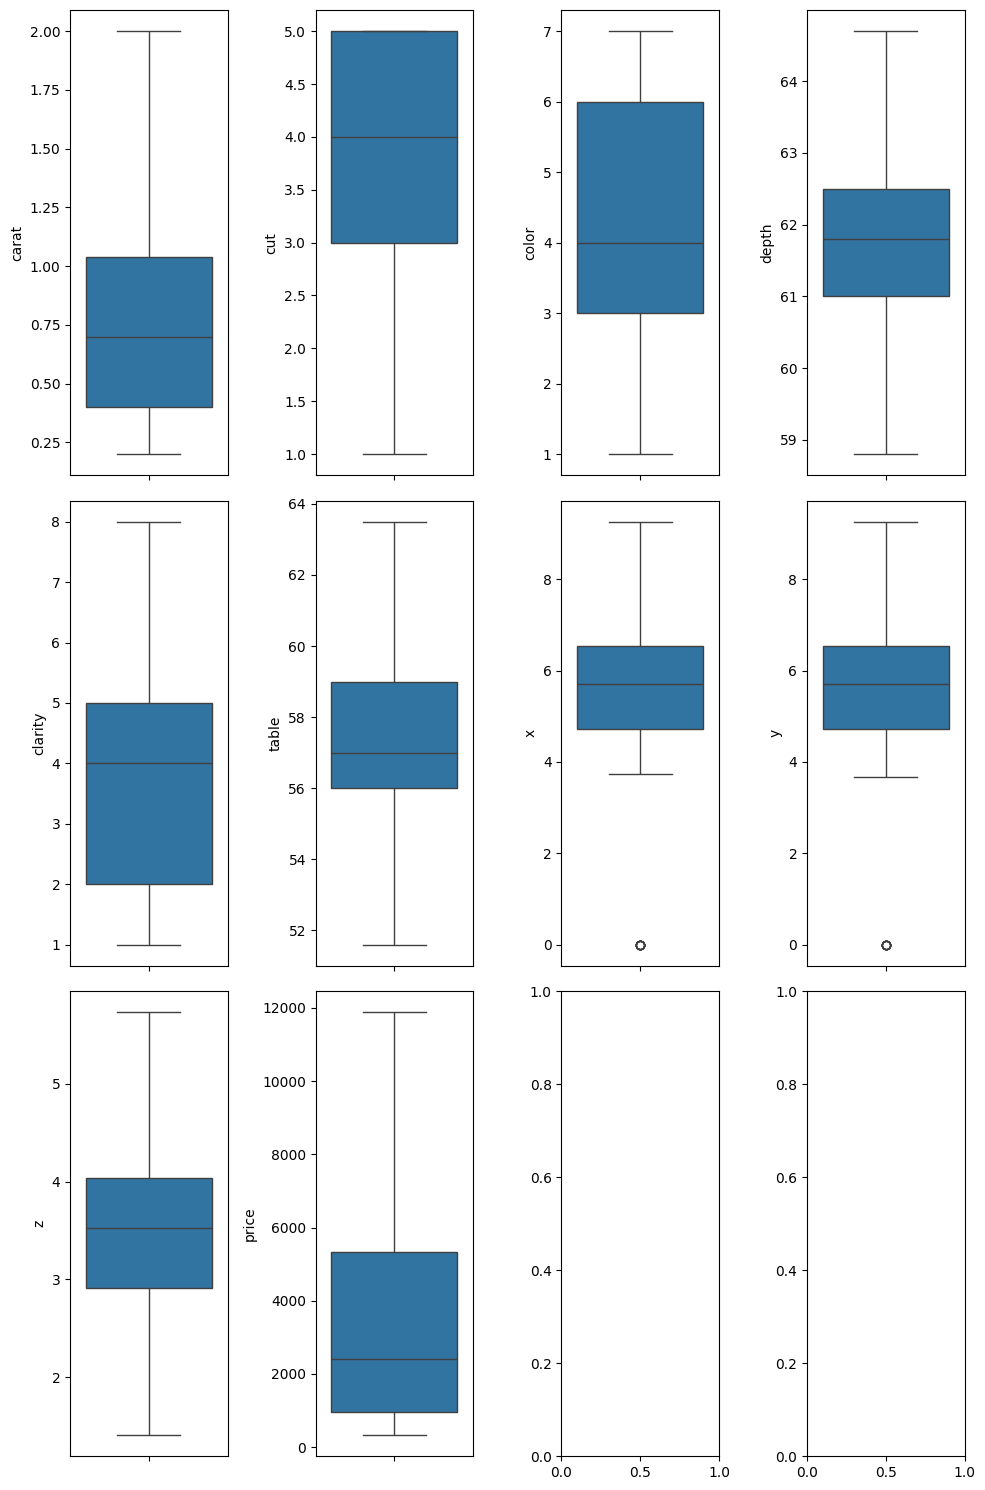

In [48]:
# Displaying boxplot to showcase outliars
fig ,axes=plt.subplots(3,4,figsize=(10,15))

sns.boxplot(data=df_new2['carat'],ax=axes[0,0])
sns.boxplot(data=df_new2['cut'],ax=axes[0,1])
sns.boxplot(data=df_new2['color'],ax=axes[0,2])
sns.boxplot(data=df_new2['depth'],ax=axes[0,3])
sns.boxplot(data=df_new2['clarity'],ax=axes[1,0])
sns.boxplot(data=df_new2['table'],ax=axes[1,1])
sns.boxplot(data=df_new2['x'],ax=axes[1,2])
sns.boxplot(data=df_new2['y'],ax=axes[1,3])
sns.boxplot(data=df_new2['z'],ax=axes[2,0])
sns.boxplot(data=df_new2['price'],ax=axes[2,1])

fig.tight_layout()

In [49]:
df_new2

carat  cut  color  clarity  depth  table     x     y     z  price
0       0.23    5      6        3   61.5   55.0  3.95  3.98  2.43    326
1       0.21    4      6        2   59.8   61.0  3.89  3.84  2.31    326
2       0.23    2      6        4   58.8   63.5  4.05  4.07  2.31    327
3       0.29    4      2        5   62.4   58.0  4.20  4.23  2.63    334
4       0.31    2      1        3   63.3   58.0  4.34  4.35  2.75    335
...      ...  ...    ...      ...    ...    ...   ...   ...   ...    ...
53935   0.72    5      7        2   60.8   57.0  5.75  5.76  3.50   2757
53936   0.72    2      7        2   63.1   55.0  5.69  5.75  3.61   2757
53937   0.70    3      7        2   62.8   60.0  5.66  5.68  3.56   2757
53938   0.86    4      3        3   61.0   58.0  6.15  6.12  3.74   2757
53939   0.75    5      7        3   62.2   55.0  5.83  5.87  3.64   2757

[53940 rows x 10 columns]

In [50]:
from sklearn.model_selection import train_test_split
# Making a NumPy array of the DataFrame
df2_np=df_new2.to_numpy()

# Assigning the Features to X and Target to Y
X,y=df2_np[:, :(df2_np.shape[1]-1)],df2_np[:,-1]

# Dividing the Dataset into train and test dataframes
X_train, X_test = np.split(get_design_matrix(X), [round(len(X)*0.7)])
y_train, y_test = np.split(y,[round(len(y)*0.7)])
len(X_train),len(y_train)

(37758, 37758)

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [52]:
# Declaring and Initializing Variables
new2_model=get_best_model(X_train, y_train)
SSE_new2=get_SSE(X_train,y_train,new2_model)
SST_new2=get_SST(y_train)
R2adj_new2=get_R2adj(SSE_new2,SST_new2,len(y),len(new2_model))

print('The ANOVA Table After Preprocessing(II):-\n')
build_anova(X_train, SSE_new2, SST_new2)

The ANOVA Table After Preprocessing(II):-

Source     | SS              |DF     | MS              | F                  |
Regression | 408569898648.15 | 8     | 51071237331.02  | F0 = 53237.49      |
Residual   | 36212976927.14  | 37749 | 959309.57       |
Total      | 444782875575.29 | 37757 |


In [53]:
# Comparing Our R-square adjusted with Sklearn
print('The Accuracy Using Written Code:',R2adj_new2*100,'%')

from sklearn.metrics import r2_score

y_pred = get_predictions(new2_model, X_test)

# Calculate R-squared using Sklearn
r_squared = r2_score(y_test, y_pred)
print("The Accuracy Using Sklearn library:", r_squared*100,'%')

The Accuracy Using Written Code: 91.85707214342139 %
The Accuracy Using Sklearn library: 92.02990790699816 %


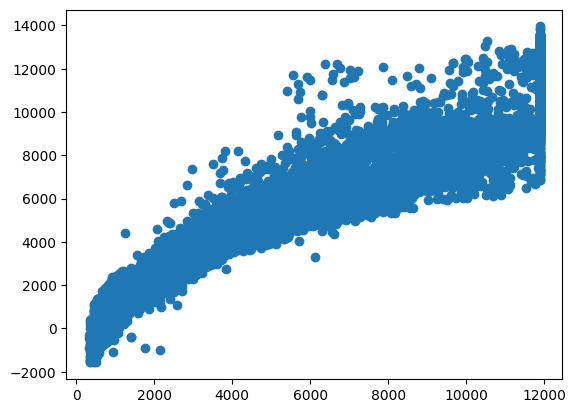

In [54]:
plt.scatter(x=y_test,y=y_pred)

In [55]:
# Using Sklearn Feature Selection to prove that all features are needed
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import r_regression,f_regression

X_newr = SelectKBest(r_regression).fit_transform(X_train, y)
X_newf = SelectKBest(f_regression).fit_transform(X_train, y)
X_train.shape,X_newr.shape,X_newf.shape

ValueError: Found input variables with inconsistent numbers of samples: [37758, 53940]

In [ ]:
# Creating a copy of the DataFrame
df_pred=df_new2.copy()

# Appending our Test Prediction Results to the DataFrame
df_pred['Test Predictions']=get_predictions(new2_model, X_train)

# Using Sklearn to get predictions
from sklearn.linear_model import LinearRegression
sklearn_model = LinearRegression().fit(X_train, y)
sklearn_y_predictions = sklearn_model.predict(X_train)

# Appending our Sklearn Prediction Results to the DataFrame
df_pred['Sklearn Predictions']=sklearn_y_predictions

In [ ]:
# Displaying the DataFrame with the new columns
df_pred

carat  cut  color  clarity  depth  table     x     y     z  price  \
0       0.23    5      6        3   61.5   55.0  3.95  3.98  2.43    326   
1       0.21    4      6        2   59.8   61.0  3.89  3.84  2.31    326   
2       0.23    2      6        4   58.8   63.5  4.05  4.07  2.31    327   
3       0.29    4      2        5   62.4   58.0  4.20  4.23  2.63    334   
4       0.31    2      1        3   63.3   58.0  4.34  4.35  2.75    335   
...      ...  ...    ...      ...    ...    ...   ...   ...   ...    ...   
53935   0.72    5      7        2   60.8   57.0  5.75  5.76  3.50   2757   
53936   0.72    2      7        2   63.1   55.0  5.69  5.75  3.61   2757   
53937   0.70    3      7        2   62.8   60.0  5.66  5.68  3.56   2757   
53938   0.86    4      3        3   61.0   58.0  6.15  6.12  3.74   2757   
53939   0.75    5      7        3   62.2   55.0  5.83  5.87  3.64   2757   

       Test Predictions  Sklearn Predictions  
0           -139.876206          -139.876206  
1           -888.838340          -888.838340  
2           -306.214869          -306.214869  
3           -277.425606          -277.425606  
4          -1342.864120         -1342.864120  
...                 ...                  ...  
53935       3237.033627          3237.033627  
53936       2891.280117          2891.280117  
53937       2727.234024          2727.234024  
53938       3445.741755          3445.741755  
53939       3797.308640          3797.308640  

[53940 rows x 12 columns]

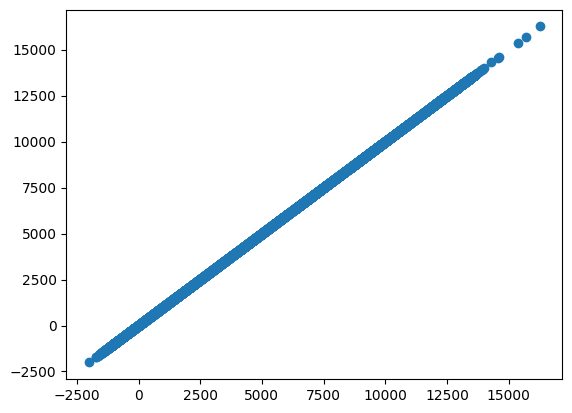

In [ ]:
# Plotting a scatterplot to showcase their identical relation
plt.scatter(x=df_pred['Test Predictions'],y=df_pred['Sklearn Predictions'])

# Displaying the rest of the statistics using Statsmodels API

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Define the linear regression model with multiple predictors
model = smf.ols('price ~ carat + cut + color + clarity + depth + table + x + y + z', data=df_new2).fit()

# Print the regression model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 6.811e+04
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        23:52:51   Log-Likelihood:            -4.4790e+05
No. Observations:               53940   AIC:                         8.958e+05
Df Residuals:                   53930   BIC:                         8.959e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1957.4359    449.351     -4.356      0.0

In [ ]:
# Compute and print the residuals of the model
print(model.resid)

# Compute and print the fitted values
print(model.fittedvalues)


0         465.876206
1        1214.838340
2         633.214869
3         611.425606
4        1677.864120
            ...     
53935    -480.033627
53936    -134.280117
53937      29.765976
53938    -688.741755
53939   -1040.308640
Length: 53940, dtype: float64
0        -139.876206
1        -888.838340
2        -306.214869
3        -277.425606
4       -1342.864120
            ...     
53935    3237.033627
53936    2891.280117
53937    2727.234024
53938    3445.741755
53939    3797.308640
Length: 53940, dtype: float64
[-139.87620634 -888.83834032 -306.21486892 ... 2727.23402406 3445.74175528
 3797.30864015]


In [ ]:
# Print the Analysis of Variance Table
print(sm.stats.anova_lm(model, typ=2))

                sum_sq       df             F         PR(>F)
carat     3.030295e+10      1.0  31730.431615   0.000000e+00
cut       7.087496e+08      1.0    742.136614  2.599654e-162
color     8.268823e+09      1.0   8658.342361   0.000000e+00
clarity   1.471661e+10      1.0  15409.859915   0.000000e+00
depth     7.694492e+05      1.0      0.805696   3.693999e-01
table     5.889093e+07      1.0     61.665103   4.146022e-15
x         3.853124e+08      1.0    403.463249   2.064179e-89
y         3.202250e+08      1.0    335.309808   1.130042e-74
z         7.277179e+07      1.0     76.199844   2.635343e-18
Residual  5.150381e+10  53930.0           NaN            NaN


In [ ]:
# Print the confidence interval of the coefficients
print(model.conf_int())

                     0            1
Intercept -2838.166983 -1076.704880
carat      8793.364837  8989.028446
cut         116.716291   134.813218
color       236.905658   247.100761
clarity     311.593366   321.590799
depth       -16.719151     6.215840
table       -24.288787   -14.585828
x         -1485.709403 -1221.539114
y          1098.990201  1362.456551
z          -714.295620  -452.345758


In [ ]:
# Creating a Sample DataFrame to predict with
new_data = pd.DataFrame({'carat':[0.45,0.24,0.78],'cut':[4,5,2],'color':[3,6,1],
                        'clarity':[3,5,2],'depth':[65.1,58.1,76.8],'table':[61,54,56],
                        'x':[4.34,3.79,5.7],'y':[4.07,5.78,6.01],'z':[2.49,3.38,4.32]})

# Predict the fitted value at certain x values 
predictions1=model.predict(new_data) # using statsmodels.api
predictions2=get_predictions(new2_model,get_design_matrix(new_data)) # using written code and

# Displaying the Comparison
print('Statsmodel.API Predictions | Test Predictions')
for i in range(len(predictions2)):
    print(f'{predictions1[i]:<27}| {predictions2[i]}')

Statsmodel.API Predictions | Test Predictions
376.73526932765026         | 376.7352693159846
2497.240165707898          | 2497.2401657201253
1773.6418153809886         | 1773.6418153640793


In [ ]:
# Print the confidence interval for fitted values
predictions = model.get_prediction(new_data)
print(predictions.summary_frame(alpha=0.05))

          mean     mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0   376.735269   35.920659     306.330491     447.140048  -1539.970742   
1  2497.240166  132.793794    2236.963271    2757.517060    564.224604   
2  1773.641815   64.031529    1648.139508    1899.144122   -145.877898   

   obs_ci_upper  
0   2293.441280  
1   4430.255728  
2   3693.161529  


# Visualization

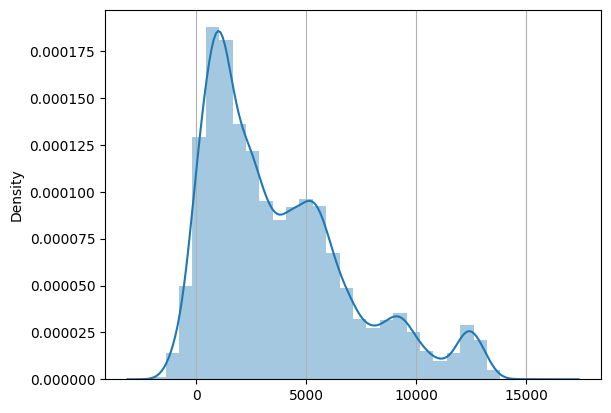

In [ ]:
# Displaying the distribution plot of our predicted result
sns.distplot(y_pred,bins=30)
plt.grid(axis='x')

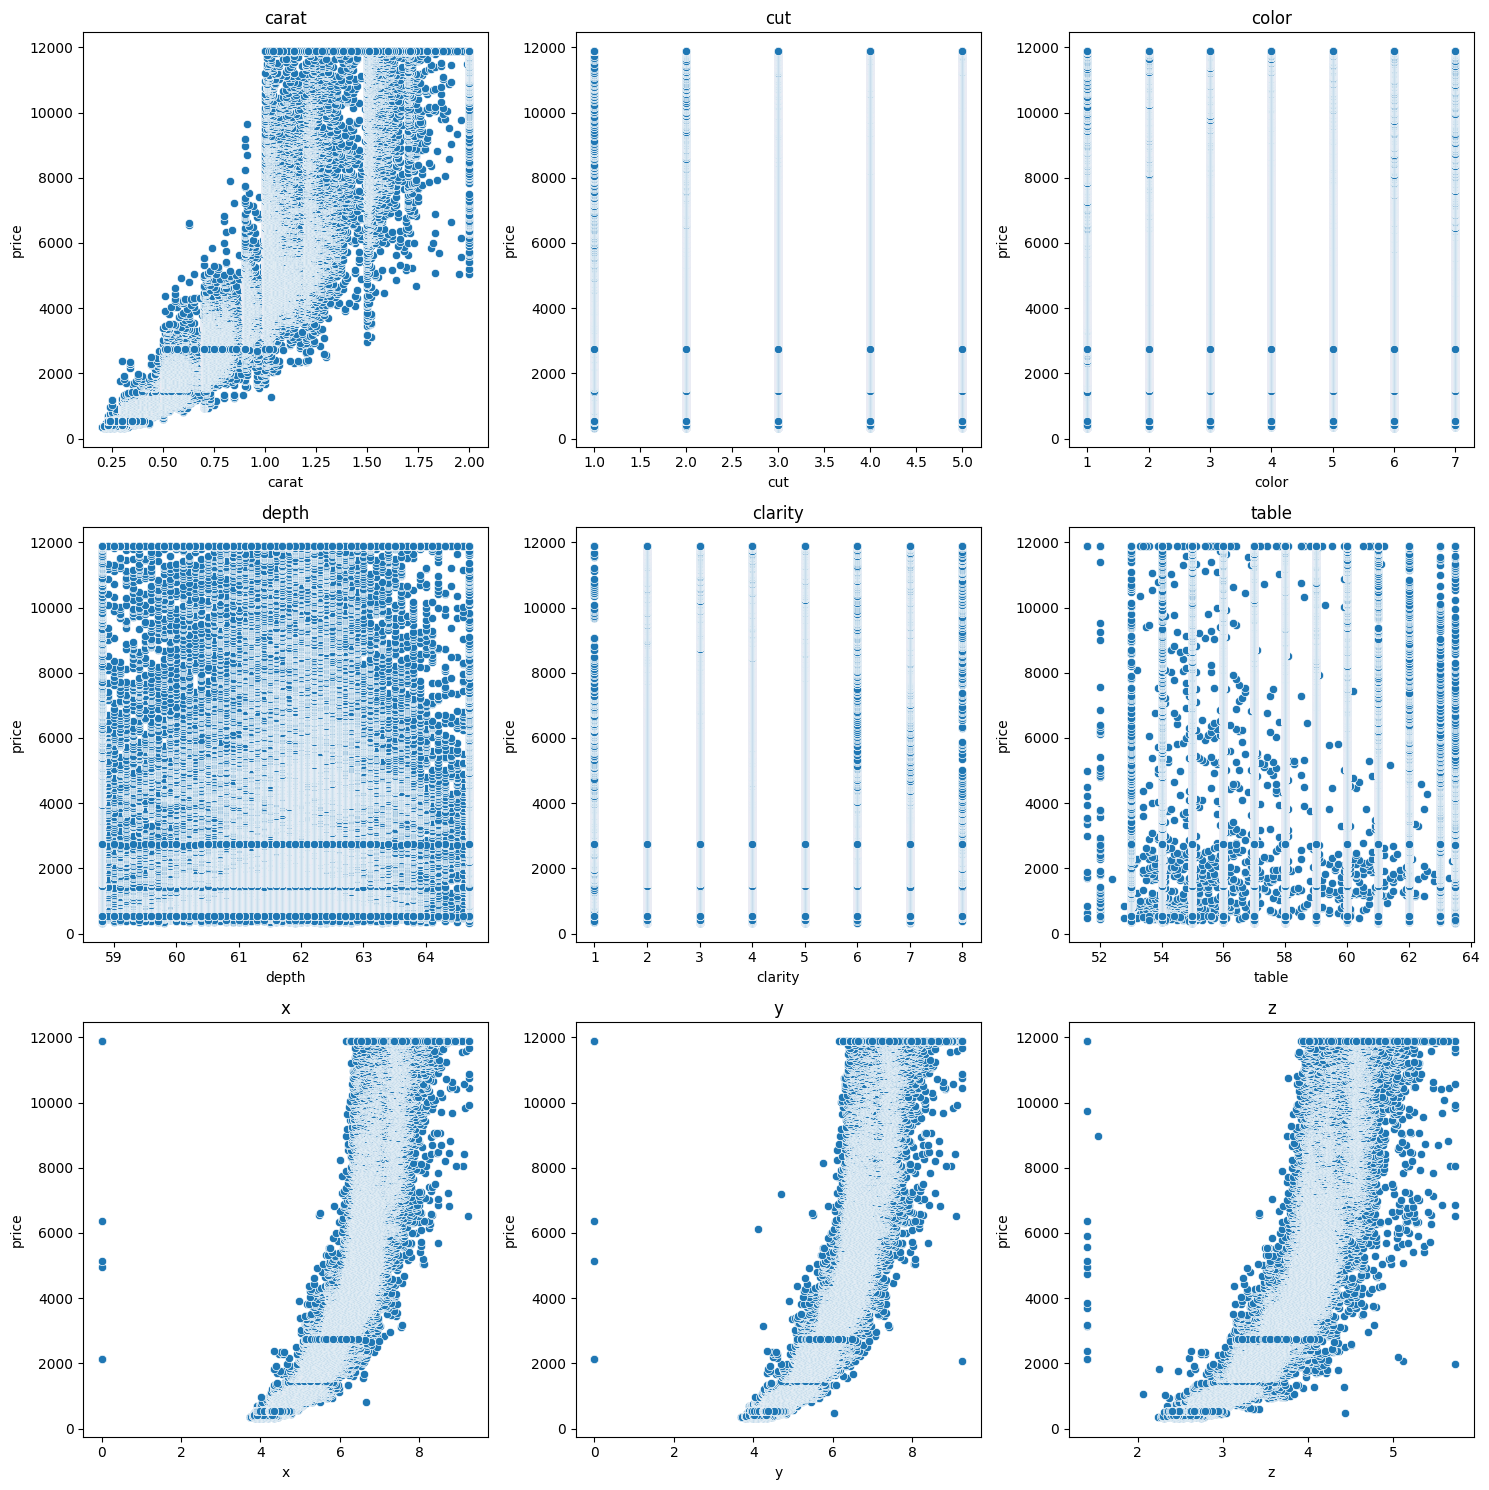

In [ ]:
# List of attributes to plot against the price
attributes = ['carat', 'cut', 'color', 'depth', 'clarity', 'table', 'x', 'y', 'z']

# Set up the matplotlib figure
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Loop through each attribute and create a scatterplot
for i, attribute in enumerate(attributes):
    sns.scatterplot(x=attribute, y='price', data=df_new2, ax=axs[i])
    axs[i].set_title(attribute)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Text(0.5, 1.0, 'Price vs. Model Predictions')

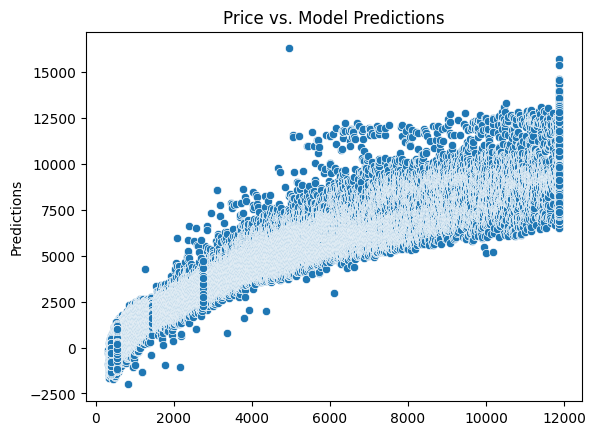

In [ ]:
# Scatter plot of actual values of y vs predicted values.
sns.scatterplot(x=y, y=y_pred)
plt.ylabel('Predictions')
plt.title('Price vs. Model Predictions')

Now that the model is trained, we should be able to use it to make our predictions and evaluate our model. The scatter plot below plots the actual y values to the model's predictions. The model seems to behave accurately.

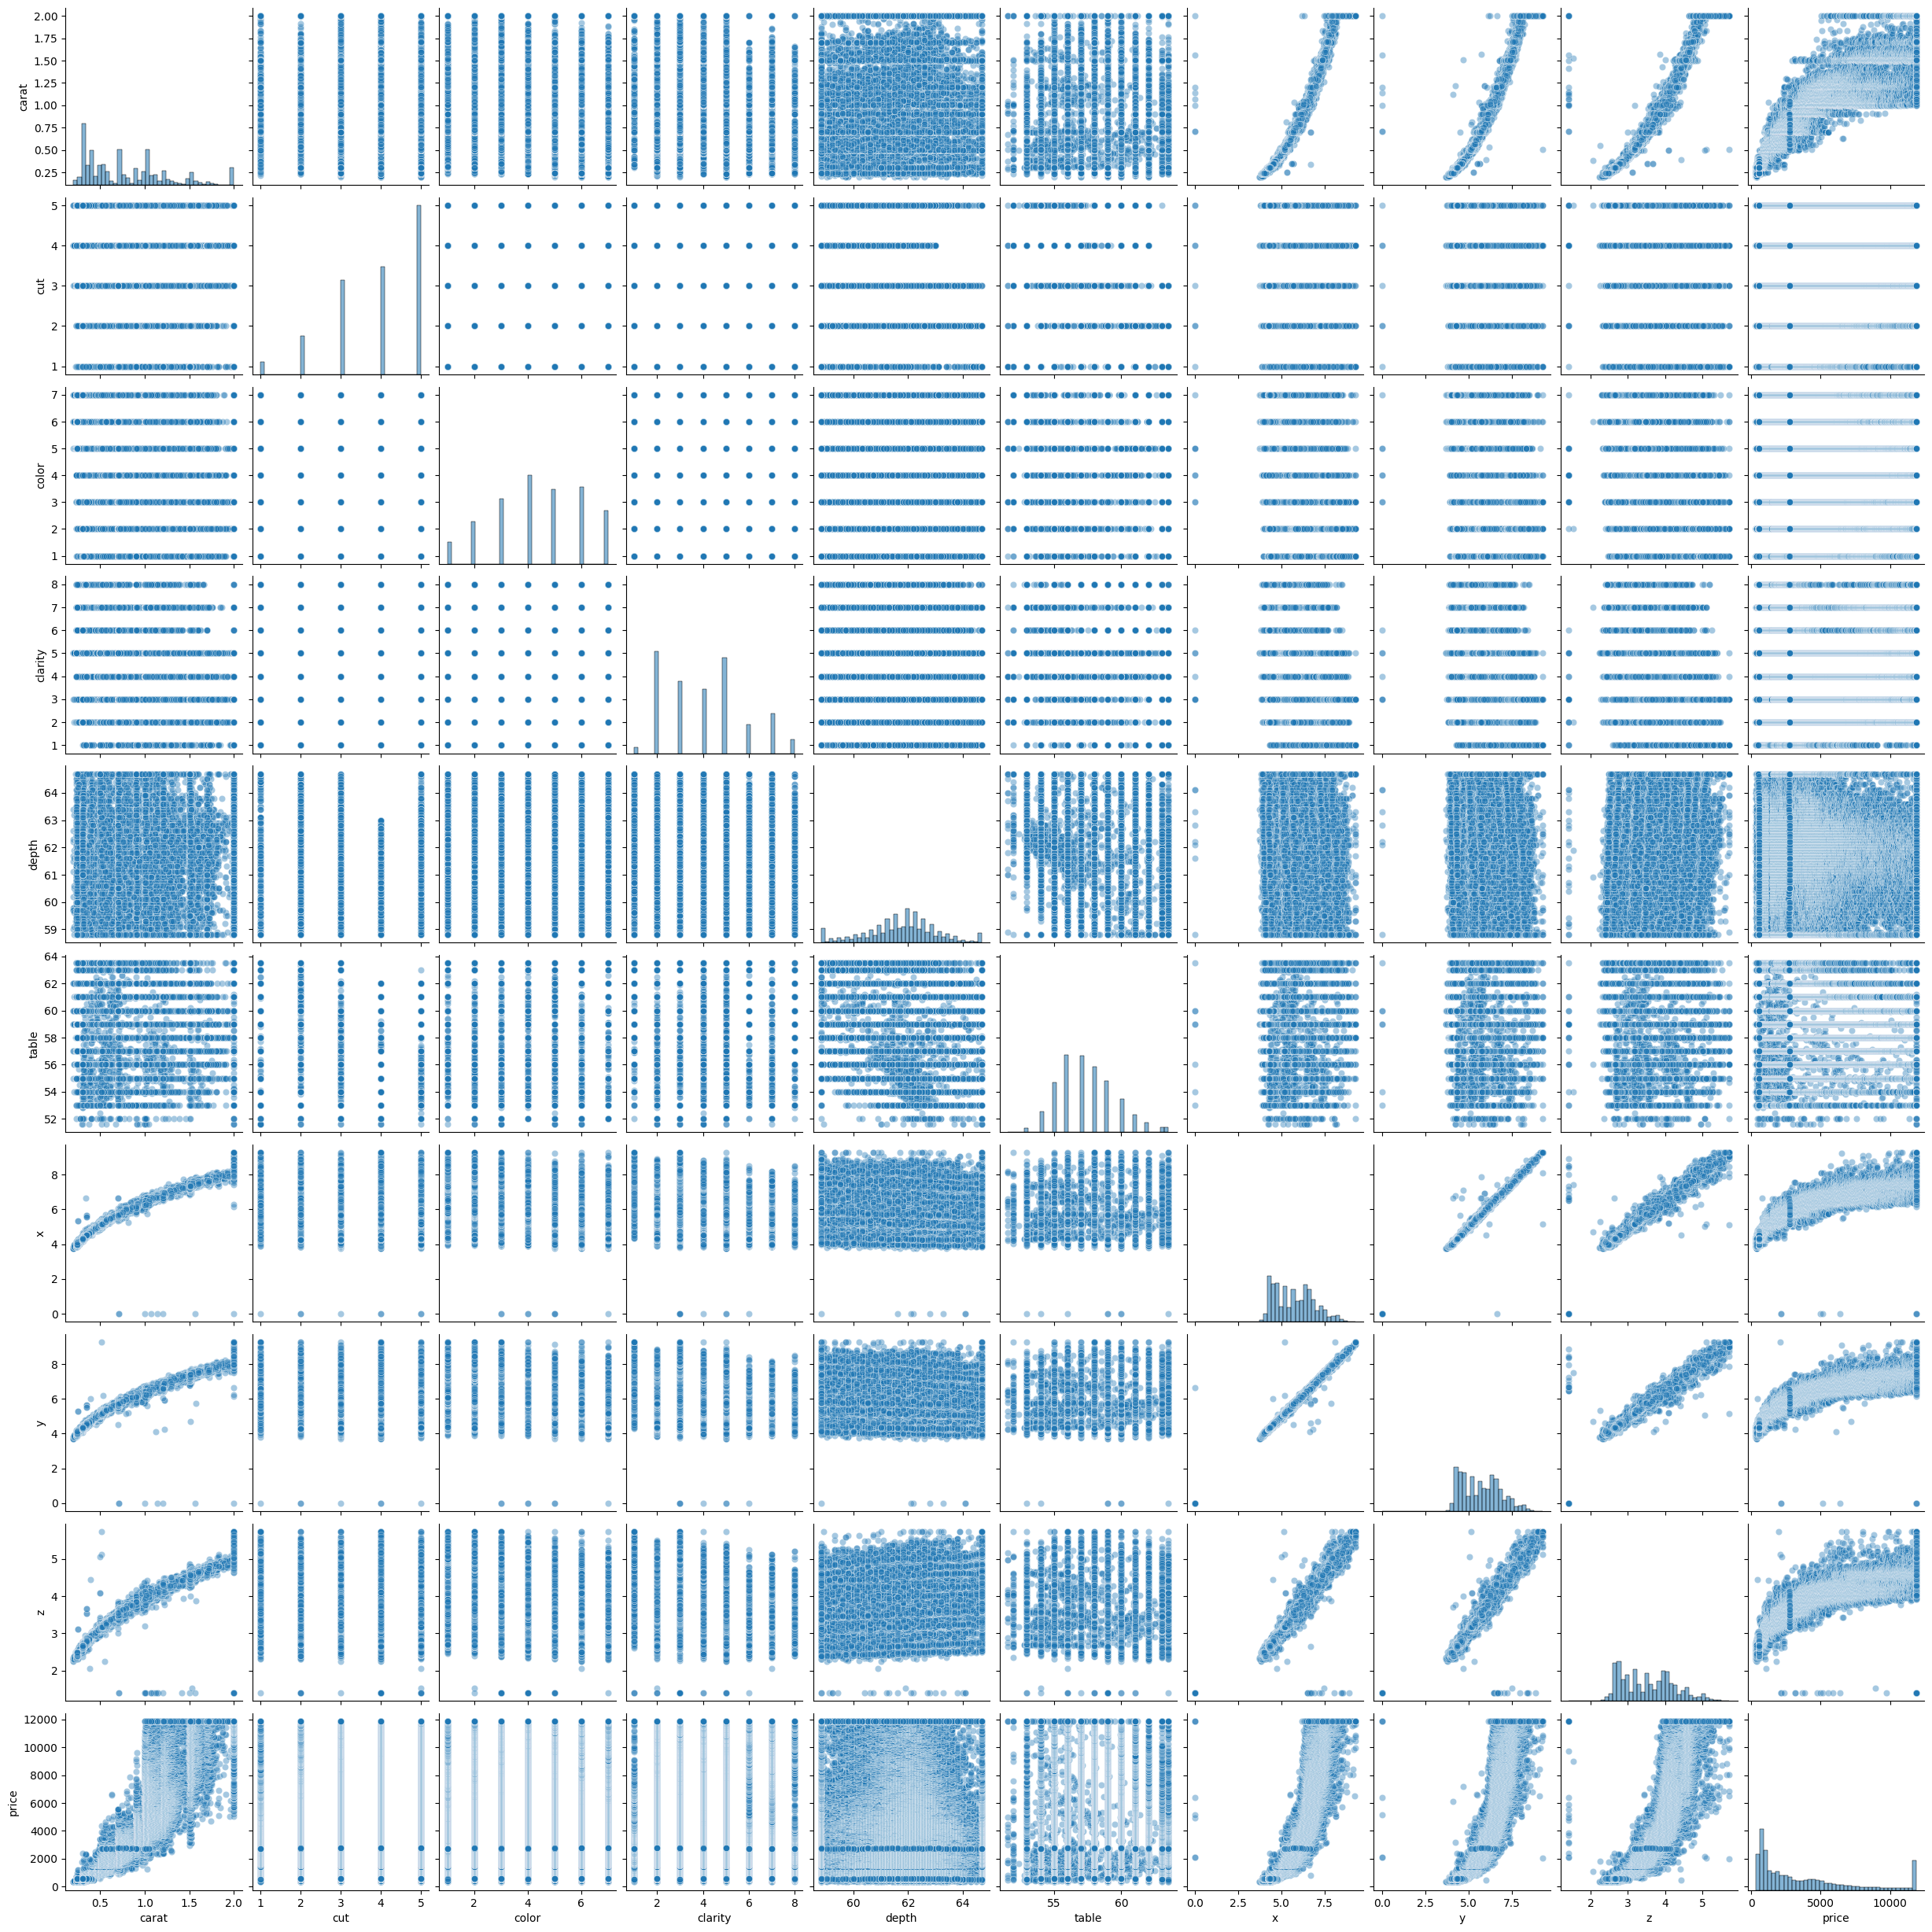

In [ ]:
sns.pairplot(df_new2, 
             kind='scatter', 
             plot_kws={'alpha':0.4}, 
             diag_kws={'alpha':0.55, 'bins':40})

Based on the visual analysis, it is evident that the variables **x**, **y**, **z**, and **carat** exhibit a strong correlation with the price. but, variables such as **cut**, **color**, **clarity**, **table**, and **depth** demonstrate a weaker correlation with the price.

# Residuals

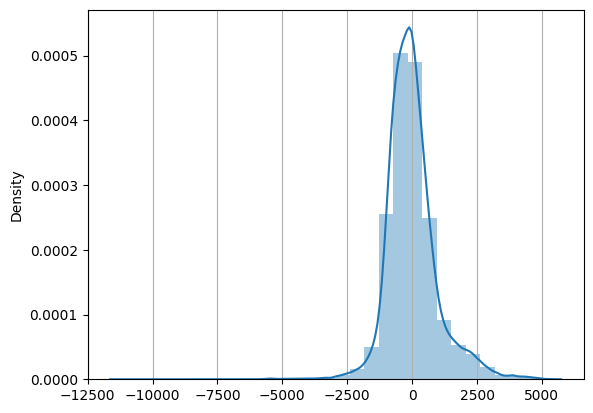

In [ ]:
residuals=df_pred['price']-df_pred['Test Predictions']
sns.distplot(residuals,bins=30)
plt.grid(axis='x')

Distribution plot of the residuals of the model's predictions. They should be normally distributed.

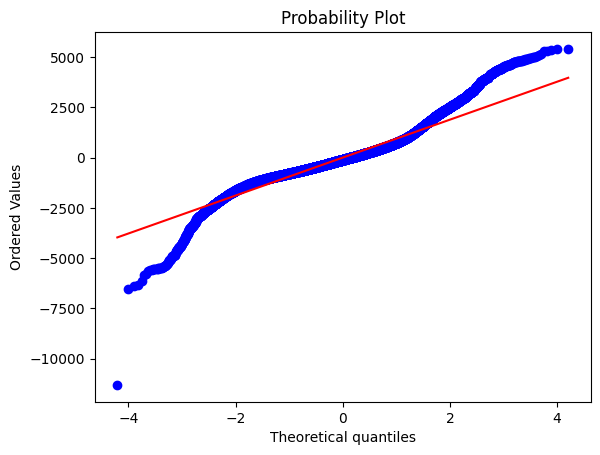

In [ ]:
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

The probability plot will typically show the data points in your residuals array plotted against the expected quantiles of the normal distribution. If the data points form approximately a straight line, this indicates that the data are normally distributed. The function also calculates a best-fit line for the data points and plots this line on the graph. The closer the data points are to this line, the more closely they follow a normal distribution.